In [169]:
import pandas as pd
import numpy as np
%matplotlib inline

In [170]:
col_names = ["user_id", "operator_name", "content_id", "content_title", "show_duration"]
content_watch = pd.read_csv('content_watch.csv',
                 sep='\t',
                 header=None,
                 names = col_names)
content_watch.head()

,user_id,operator_name,content_id,content_title,show_duration
0,827375963,Rostelecom,9966,Луна,1400
1,890810589,LLC TOMTEL,10140,Солдаты,1271
2,929088258,OJS Moscow city telephone network,9572,Мажор,30
3,987577016,Rostelecom,8014,Клуб Винкс – Школа волшебниц,1310
4,573841374,OJS Moscow city telephone network,9983,Метод,3205


In [101]:
content_watch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
user_id          20000 non-null int64
operator_name    20000 non-null object
content_id       20000 non-null int64
content_title    20000 non-null object
show_duration    20000 non-null object
dtypes: int64(2), object(3)
memory usage: 781.3+ KB


In [171]:
content_watch['content_id'] = content_watch['content_id'].astype('object')
content_watch['user_id'] = content_watch['user_id'].astype('object')

In [172]:
content_watch['show_duration'] = content_watch['show_duration'].replace({'None': 0})
content_watch['show_duration'] = content_watch['show_duration'].astype('int')
content_watch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
user_id          20000 non-null object
operator_name    20000 non-null object
content_id       20000 non-null object
content_title    20000 non-null object
show_duration    20000 non-null int64
dtypes: int64(1), object(4)
memory usage: 781.3+ KB


In [173]:
male_prob = 0.4
content_watch["gender"] = np.random.binomial(1, male_prob, content_watch.shape[0])
content_watch.head()

,user_id,operator_name,content_id,content_title,show_duration,gender
0,827375963,Rostelecom,9966,Луна,1400,0
1,890810589,LLC TOMTEL,10140,Солдаты,1271,1
2,929088258,OJS Moscow city telephone network,9572,Мажор,30,0
3,987577016,Rostelecom,8014,Клуб Винкс – Школа волшебниц,1310,0
4,573841374,OJS Moscow city telephone network,9983,Метод,3205,0


**Какой фильм был просмотрен максимальным количеством человек?
Какой пользователь посмотрел больше всех фильмов? **

In [167]:
content_watch[content_watch['show_duration'] != 0].drop_duplicates(['user_id', 'content_title'])\
    ['content_title'].value_counts().head(1)

Мастер и Маргарита    1586
Name: content_title, dtype: int64

In [168]:
#content_watch.drop_duplicates(['user_id', 'content_title'])['user_id'].value_counts().head()
content_watch[content_watch['show_duration'] != 0].drop_duplicates(['user_id', 'content_title'])\
    ['user_id'].value_counts().head(1)

446413452    6
Name: user_id, dtype: int64

** У какого оператора больше всего пользователей? **

In [130]:
content_watch.drop_duplicates('user_id')['operator_name'].value_counts().head(1)

Rostelecom    2230
Name: operator_name, dtype: int64

** Постройте любую визуализацию с помощью метода plot **

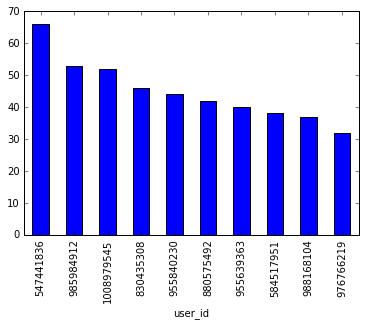

In [114]:
content_watch.groupby('user_id')['content_title']\
    .agg(np.count_nonzero)\
    .sort_values(ascending=False).head(10).plot(kind='bar')

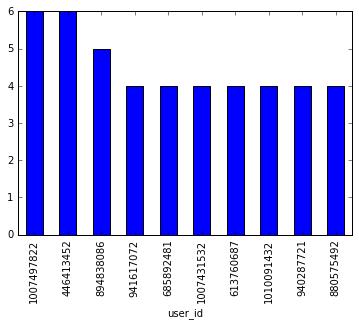

In [111]:
content_watch.drop_duplicates(['user_id', 'content_title']).groupby('user_id')['content_title']\
    .agg(np.count_nonzero)\
    .sort_values(ascending=False).head(10).plot(kind='bar')

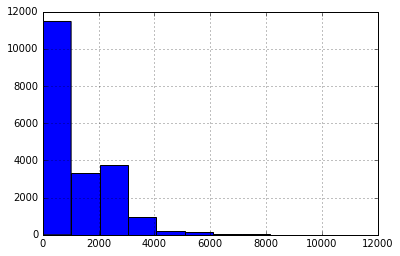

In [116]:
content_watch['show_duration'].hist()

** Какой средний показатель по числу просмотренных фильмов среди мужчин - пользователей Ростелекома? **

In [166]:
content_watch[(content_watch['gender'] == 1) & (content_watch['operator_name'] == 'Rostelecom')]\
    .groupby('user_id')['content_title'].agg(np.count_nonzero).mean()

1.6857610474631752

**Построить по данным файла content_watch.csv матрицу user-item **

В матрице должно быть 2 столбца

Первый столбец - user_id

Второй столбец - list из content_id, которые смотрел user_id. Оставлять нужно только уникальные id контента - повторов быть не должно 

In [185]:
user_item = pd.DataFrame(content_watch.drop_duplicates(['user_id', 'content_id']).groupby('user_id')['content_id']\
    .apply(lambda content: list(content)))
user_item.head()    

,content_id
user_id,
46429,[11047]
133989,[11047]
234092,[10183]
535270,[9983]
540203,[8706]
